In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
lista_vel_gal = []
c = 299792.4 #km/s
#for i in range(len(lista_lambda_rest)):
#    lista_vel_gal.append(c * ((float(lista_lambda_rest) - 21.0985)/ 21.1055)) # em cm

#lista_vel_gal

In [4]:
lista_velocidade = []
lista_fluxo = []
lista_frequency = []
for line in open('ngc3887.dat', 'r'):
	values = [float(s) for s in line.split()]
	lista_velocidade.append(values[0])
	lista_fluxo.append(values[1])
	lista_frequency.append(values[2])
    
plt.figure(figsize=(7,5))
plt.plot(lista_frequency,lista_fluxo,'k', linewidth=1, linestyle="-", label="Surface brightness")
plt.title('NGC3887')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("Frequency [GHz]")
plt.grid(True)


FileNotFoundError: [Errno 2] No such file or directory: 'ngc3887.dat'

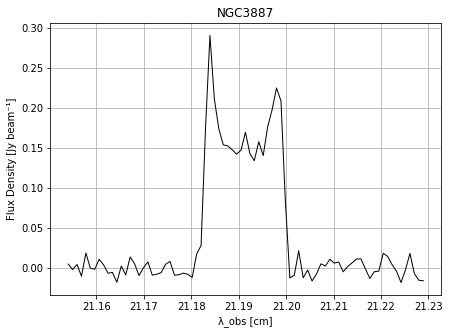

In [14]:
lista_lambda_novo = []
c = 299792.4 #km/s
for i in range(len(lista_frequency)):
    lista_lambda_novo.append(c / lista_frequency[i] * 100000) # em cm
# f = c / 1
#lista_lambda_novo

plt.figure(figsize=(7,5))
plt.plot(lista_lambda_novo,lista_fluxo,'k', linewidth=1, linestyle="-", label="Surface brightness")
plt.title('NGC3887')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("λ_obs [cm]")
plt.grid(True)
plt.savefig("/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Estudo da massa dinâmica/NGC3887/NGC3887_Flux_Lambda_Obs.png")

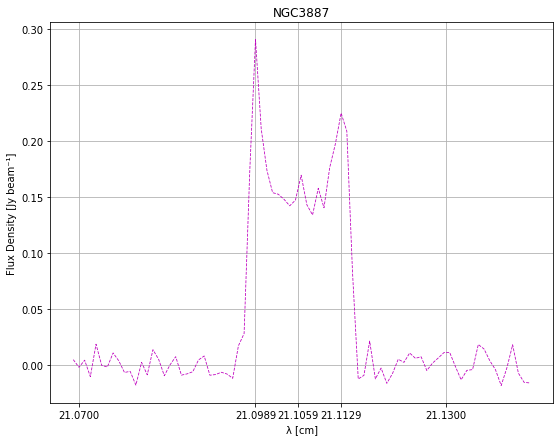

In [15]:
z = 0.00403
lista_lambda_emit = []
for i in range(len(lista_lambda_novo)):
    lista_lambda_emit.append(lista_lambda_novo[i] / (z+1))
#lista_lambda_rest

# lambda_obs = lambda_rest * (1 + z)
plt.figure(figsize=(9,7))
plt.plot(lista_lambda_emit,lista_fluxo,'m', linewidth=0.8, linestyle="--", label="Surface brightness")
plt.title('NGC3887')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("λ [cm]")
plt.xticks([21.07,21.0989,21.1129,21.13,21.1059])
plt.grid(True)
plt.savefig("/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Estudo da massa dinâmica/NGC3887/NGC3887_Flux_Lambda_Emitido.png")

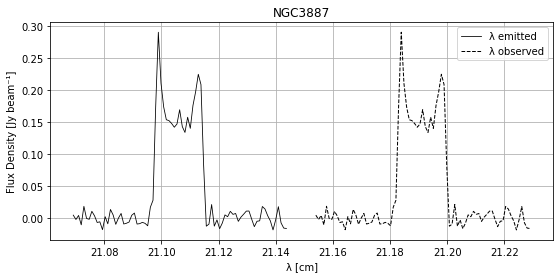

In [16]:
vel_ajustada = []
for i in range(len(lista_velocidade)):
    vel_ajustada.append(lista_velocidade[i] - 1207.863982)
plt.figure(figsize=(9,4))
plt.plot(lista_lambda_emit,lista_fluxo,'k', linewidth=0.8, linestyle="-", label="λ emitted")
plt.plot(lista_lambda_novo,lista_fluxo,'k', linewidth=1, linestyle="--", label="λ observed")
plt.title('NGC3887')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("λ [cm]")
plt.legend()
plt.grid(True)
#plt.xticks([-400,-250,-93.25,0,93.25,250,400])
plt.savefig("/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Estudo da massa dinâmica/NGC3887/NGC3887_λEmmited_λObserved.png")

In [17]:
# valor central lambda
lambda_central = abs(21.0989 - 21.1129)/2 + 21.0989
print("λ central é", lambda_central, "cm")

# Vel_orb = ((Diferença do λ entre os picos) / λ central) * c
vel_max = (((abs(21.0989 - 21.1129) / lambda_central)*c)/2)
print("A velocidade máxima é",vel_max,"km s⁻¹")

λ central é 21.1059 cm
A velocidade máxima é 99.42939178144036 km s⁻¹


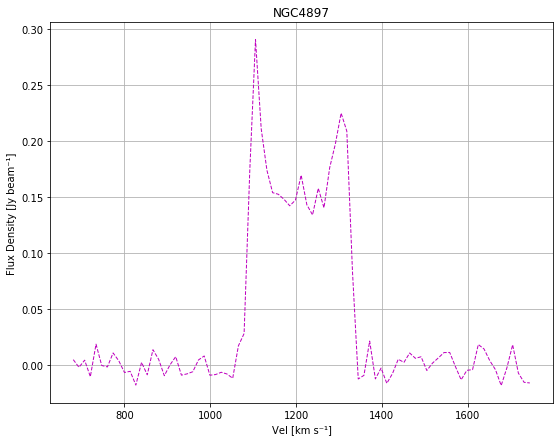

In [18]:
lista_final_vel = []
for i in range(len(lista_lambda_emit)):
    lista_final_vel.append(((lista_lambda_emit[i] - lambda_central)/ lambda_central) * c)
#lista_final_vel

plt.figure(figsize=(9,7))
plt.plot(lista_velocidade,lista_fluxo,'m', linewidth=1, linestyle="--")
plt.title('NGC4897')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("Vel [km s⁻¹]")
#plt.xticks([2200,2450,2640,3000])
plt.grid(True)
#plt.savefig("/home/oliviernatanael/Área de Trabalho/Vel_with_redshift.png")

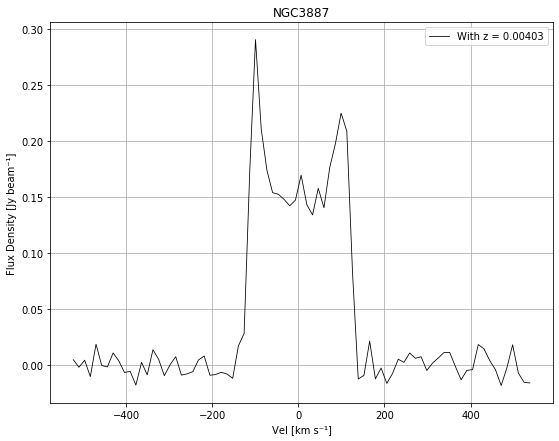

In [19]:
vel_ajustada = []
for i in range(len(lista_velocidade)):
    vel_ajustada.append(lista_velocidade[i] - 1207.863982)
plt.figure(figsize=(9,7))
plt.plot(lista_final_vel,lista_fluxo,'black', linewidth=0.8, linestyle="-", label = "With z = 0.00403")
plt.title('NGC3887')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("Vel [km s⁻¹]")
plt.legend()
plt.grid(True)
#plt.xticks([-400,-250,-93.25,0,99.42,250,400])
plt.savefig("/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Estudo da massa dinâmica/NGC3887/NGC3887_Flux_Vel_with_redshift.png")

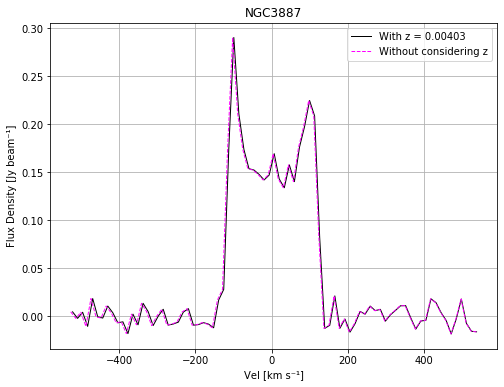

In [20]:
vel_ajustada = []
for i in range(len(lista_velocidade)):
    vel_ajustada.append(lista_velocidade[i] - 1207.863982)
plt.figure(figsize=(8,6))
plt.plot(lista_final_vel,lista_fluxo,'k', linewidth=1, linestyle="-", label = "With z = 0.00403")
plt.plot(vel_ajustada,lista_fluxo,'magenta', linewidth=1, linestyle="--", label = "Without considering z")
plt.title('NGC3887')
plt.ylabel("Flux Density [Jy beam⁻¹]")
plt.xlabel("Vel [km s⁻¹]")
plt.legend()
plt.grid(True)
#plt.xticks([-400,-250,-93.25,0,93.25,250,400])
plt.savefig("/home/oliviernatanael/Área de Trabalho/Iniciação Científica/Estudo da massa dinâmica/NGC3887/NGC3887_Flux_Vel_with_redshift_Comparation.png")

In [21]:
# calculo de massa
mass_reference = 10.476
mass_reference_without_log = 29922646366.08195
massa_solar = 1.989 * 10**(30) #kg

# Raio: em z=0.00403 com 8.76 arcmin, que é a média entre x arcmin e x arcmin (maior e menor tamanho angular da galáxia)
radius_arcmin = 8.76
R_km = 1404320226215308500 #km, 3 vezes o raio no visível

# Massa total = (Raio * V^2) / G
massa = (R_km * (vel_max)**2) / (6.67408*10**(-20)) # kg
print("A massa é", massa, 'kg')
print("A massa é", massa / massa_solar, "Мʘ, considerando o raio da galáxia como um raio de HI, ~45 kpc.")
print("Em log, a massa é", np.log10(massa / massa_solar), 'Мʘ')
log_mass = np.log10(massa / massa_solar)
print("Portanto, o log da massa presente no S⁴G é", mass_reference, "Мʘ, enquanto que o valor obtido nesse estudo foi", log_mass, "Мʘ.")
#referencia, tem que dar maior que 10.564
stellar = 100/3.45
print("Apenas ~",stellar,"% da massa total é estelar.")
print("~",-stellar -10+100, "% é matéria escura")

A massa é 2.08019624690037e+41 kg
A massa é 104585030010.07388 Мʘ, considerando o raio da galáxia como um raio de HI, ~45 kpc.
Em log, a massa é 11.019469525360211 Мʘ
Portanto, o log da massa presente no S⁴G é 10.476 Мʘ, enquanto que o valor obtido nesse estudo foi 11.019469525360211 Мʘ.
Apenas ~ 28.98550724637681 % da massa total é estelar.
~ 61.01449275362319 % é matéria escura
